# Goal :- To Predict whether a loan applicant is high-risk or low-risk based on historical data and selected features.
__Columns Info :-__

* age — Client's age (numeric)

* job — Type of job (admin., blue-collar, technician, management, services, etc.)

* marital — Marital status (single, married, divorced)

* education — Education level (basic.9y, high.school, professional.course, university.degree, etc.)

* default — Has credit in default? (yes/no)

* housing — Has a housing loan? (yes/no)

* loan — Has a personal loan? (yes/no)

* contact — How client was contacted (cellular, telephone, etc.)

* month — Month of last contact (jan, feb, etc.)

* day_of_week — Day of week of last contact (mon, tue, etc.)

* campaign — Number of times client has been contacted during this campaign

* pdays — Days passed since client was last contacted from previous campaign (999 = never contacted)

* previous — Number of times client is contacted before this campaign
* poutcome — Outcome of previous marketing campaign (success, failure, nonexistent, etc.)

* y (or Loan_Status/Loan_Status_label) — Did the client accept loan/subscribed to deposit (target)

# Steps :                             
* 1. Importing the relevant libraries / Modules
* 2. Loading the data
* 3. Initial Inspection / Statistical Analysis
* 4. EDA / Data Preprocessing
  * Imbalance Data
  * Missing Data
  * Duplicate Data
  * Outliers or Anomalies Detection
  * Data Visualisation
  * Feature Encoding
  * Multi-Collinearity
  * Feature Selection
* 5. Model Building
  * Seperating I/D and D/P data
  * Split data into train , test data
  * Feature Scaling
  * Model Training
  * Model Prediction
  * Model Evaluation
  * Hyperparameter Tuning
* 6. Model Selection
* 7. Model Interpretation
* 8. Model Deployment
* __Summary__

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# Used but very slow
from sklearn import tree

from sklearn.metrics import confusion_matrix ,accuracy_score , classification_report,roc_curve, roc_auc_score,precision_recall_curve,auc
from imblearn.over_sampling import SMOTE
import joblib

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
df=pd.read_csv('/content/loan_detection.csv')

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## Initial Inspection / Statistical Analysis of dataset

In [5]:
# Shape of dataset
print("Shape of the dataset :" ,df.shape)

Shape of the dataset : (41188, 60)


In [6]:
# Dimension
print("Dimension of the dataset :" ,df.ndim)

Dimension of the dataset : 2


In [7]:
# Column name of datset
print("Column names: \n", df.columns)

Column names: 
 Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', '

In [8]:
# Data type of each column
print("Count of Data types of columns:\n" )
display(df.dtypes.value_counts())  # display is jupyter /IPython command

Count of Data types of columns:



,count
int64,60


In [9]:
# Seperating numerical columns and categorical columns as here are one hot encoded columns.
numerical_cols=df.columns.to_list()[:4]
print("Numerical Columns : ", numerical_cols)

Numerical Columns :  ['age', 'campaign', 'pdays', 'previous']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [11]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Basic EDA

### __Imbalance Data__

In [12]:
# Checking  the distribution of the target variable
print("Distribution of the target variable ('Loan_Status_label'):")
display(df['Loan_Status_label'].value_counts())

print(f"\nNot Approved  (0) : {round(len(df[df['Loan_Status_label']==0])/len(df),2) * 100} % ")
print(f"Approved  (1) : {round(len(df[df['Loan_Status_label']==1])/len(df),2) * 100} % ")
print("\nData is imbalanced.")

Distribution of the target variable ('Loan_Status_label'):


,count
Loan_Status_label,
0,36548
1,4640



Not Approved  (0) : 89.0 % 
Approved  (1) : 11.0 % 

Data is imbalanced.


### __Missing Data__

In [13]:
# Missing values per column
# Defining Missing state to find is there any missing value
Missing=False
for col in df.columns:
  if df[col].isnull().sum()>0:
    if Missing==False:
      Missing=True
      print("Missing values per column with Missing Values :")
    display(df[col].isnull().sum())
    print("-----% of missing values in individual column -------")
    display(df.isna().mean()*100)
if df.isnull().values.any() == False:
    print("No missing Data in dataframe.")

No missing Data in dataframe.


### __Duplicate Values__

In [14]:
# Finding number of duplicated rows
duplicates=df.duplicated().sum()
print("Duplicate rows found : ",duplicates)

Duplicate rows found :  2417


In [15]:
# DataFrame of Duplicated Data
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [16]:
# Counting rows before duplicate removal
original_rows_with_duplicate=df.shape[0]
print("Number of rows before duplicate removal:", original_rows_with_duplicate)

Number of rows before duplicate removal: 41188


In [17]:
# Droping duplicate data keeping first one
df.drop_duplicates(keep='first',inplace=True)

In [18]:
# Shape of Data Frame after removing duplicates
print("Shape after dropping duplicates:", df.shape)
new_rows_with_no_duplicate=df.shape[0]
percent_duplicates=(original_rows_with_duplicate-new_rows_with_no_duplicate)/original_rows_with_duplicate*100
print(f"Removed {original_rows_with_duplicate-new_rows_with_no_duplicate} duplicates ({round(percent_duplicates,2) }%) ")

Shape after dropping duplicates: (38771, 60)
Removed 2417 duplicates (5.87%) 


### __Outliers Or Anomalies Detection__

__Using Box-plot__

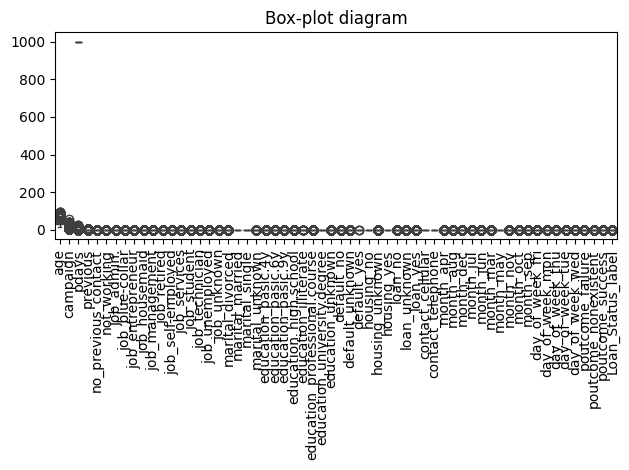

In [19]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Box-plot diagram')
plt.tight_layout()
plt.show()

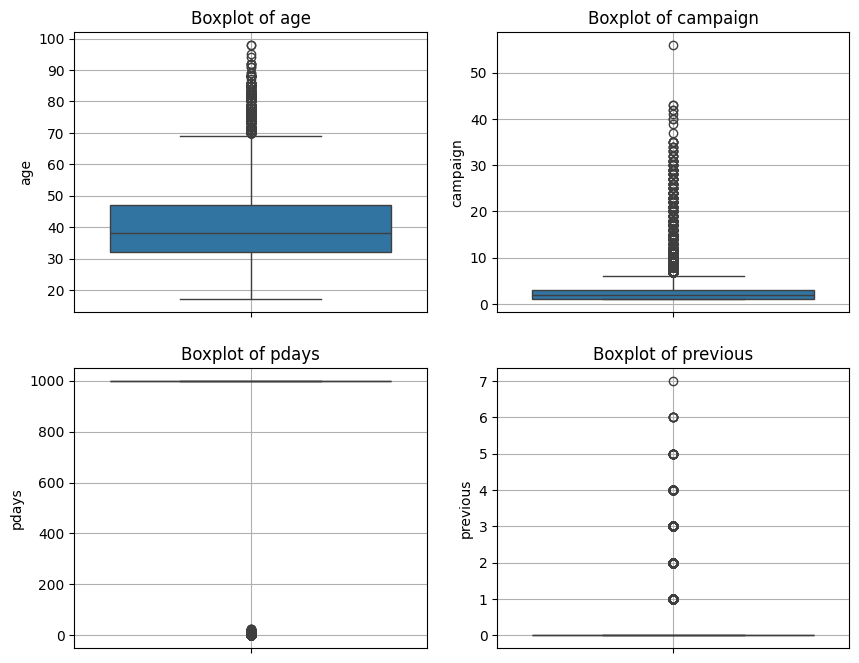

In [20]:
plt.figure(figsize=(10,8))
for i, col in enumerate(numerical_cols):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.grid()
plt.show()

__Using IQR to remove outlier__

In [21]:
# Since, 999 in pdays is dominated and unuseful data as 999.
numerical_cols.remove('pdays')

In [22]:
# Finding Q1 and Q3 of numerical data
Q1=df[numerical_cols].quantile(0.25)
Q3=df[numerical_cols].quantile(0.75)

IQR= Q3-Q1
print(f"IQR of numerical columns :\n\n {IQR}")

IQR of numerical columns :

 age         15.0
campaign     2.0
previous     0.0
dtype: float64


In [23]:
# Defining lower and upper bound
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f" Lower bound of numerical columns :\n\n{lower_bound}\n\n ")
print(f" Upper bound of numerical columns :\n\n {upper_bound}")

 Lower bound of numerical columns :

age         9.5
campaign   -2.0
previous    0.0
dtype: float64

 
 Upper bound of numerical columns :

 age         69.5
campaign     6.0
previous     0.0
dtype: float64


In [24]:
display(df[(df['age']<18)]['age'].value_counts())

,count
age,
17,5


In [25]:
df['previous'].value_counts()

,count
previous,
0,33236
1,4473
2,752
3,216
4,70
5,18
6,5
7,1


In [26]:
# age of loan applicant can not be below 18.Hence,
lower_bound['age']=18;
# Campaign can not  be negative.Hence,
lower_bound['campaign']=0;
# Since,data is already imbalanced, Thus removing previous will increase bias.Hence,
upper_bound['previous']=4;



In [27]:
print("Number of outliers in each numerical column:")
for col in numerical_cols:
    outliers_count = df[((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]))][col].count()
    print(f"{col}: {outliers_count}")

Number of outliers in each numerical column:
age: 462
campaign: 2396
previous: 24


* We cap outliers (rather than dropping) to minimize loss of data.
* Outlier removal is only performed on true numerical and continuous data

In [28]:
df_outliers=df[((df[numerical_cols]<lower_bound)| (df[numerical_cols]>upper_bound)).any(axis=1)]
display(df_outliers.head())
# Winsorizing Outliers [ Used it to prevent necessary data loss like previous,campaign]
for col in numerical_cols:
  df[col] = np.where(df[col]>upper_bound[col],upper_bound[col],df[col])
  df[col] = np.where(df[col]<lower_bound[col],lower_bound[col],df[col])
print(f'Outliers removed in {numerical_cols} and winorised it .')

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
887,54,7,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1043,41,8,999,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1094,40,8,999,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1097,51,7,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1230,48,7,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


Outliers removed in ['age', 'campaign', 'previous'] and winorised it .


* Other Ways to deal with Outlier:-    
    - outliers_mask = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)
    - df_outliers = df[outliers_mask]
    - display(df_outliers.head())
    - df = df[~outliers_mask]

In [29]:
print("After removing Outlier , Shape of Data is ", df.shape)

After removing Outlier , Shape of Data is  (38771, 60)


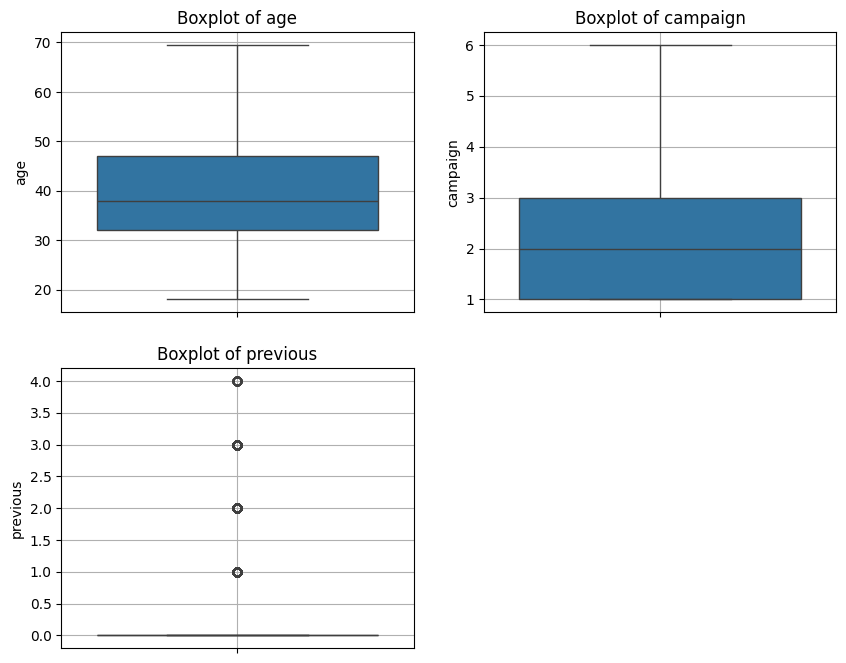

In [30]:
# Verifying outlier is removed
plt.figure(figsize=(10,8))
for i, col in enumerate(numerical_cols):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.grid()
plt.show()

### Data Visualisation

**Numerical data**

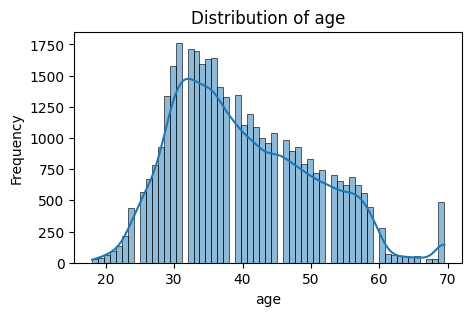

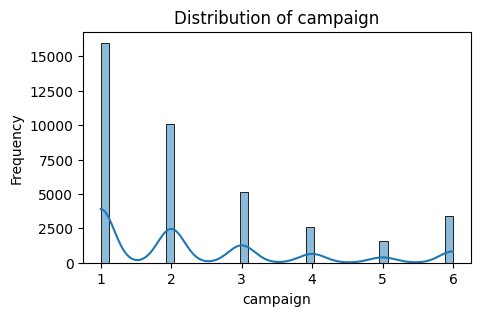

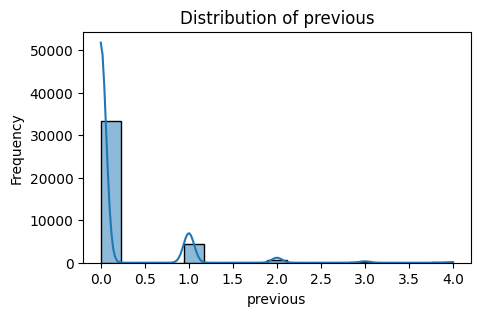

In [31]:
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


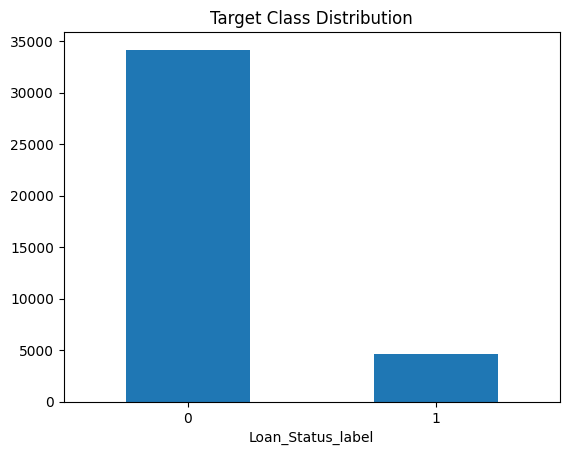

In [32]:
# Data Imbalance Check
df.iloc[:,-1].value_counts().plot(kind='bar')
plt.title('Target Class Distribution')
plt.xticks(rotation=0)
plt.show()

### Feature Encoding
- Here , data is already hot encoded and no textual data is present. Thus feature encoding is not necessary.

### Feature Engineering

In [33]:
# These columns are dominated. Thus , we are encoding as binary
df['pdays'].value_counts()

,count
pdays,
999,37257
3,438
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [34]:
df['previous'].value_counts()

,count
previous,
0.0,33236
1.0,4473
2.0,752
3.0,216
4.0,94


In [35]:
df['pdays_contacted'] = (df['pdays'] != 999).astype(int)
df['previous_contacted'] = (df['previous'] > 0).astype(int)
df.drop(columns=['pdays', 'previous'], inplace=True)
new_numerical_cols=['age','campaign']


### Feature Selection

Correlatiom matrix for true numerical data

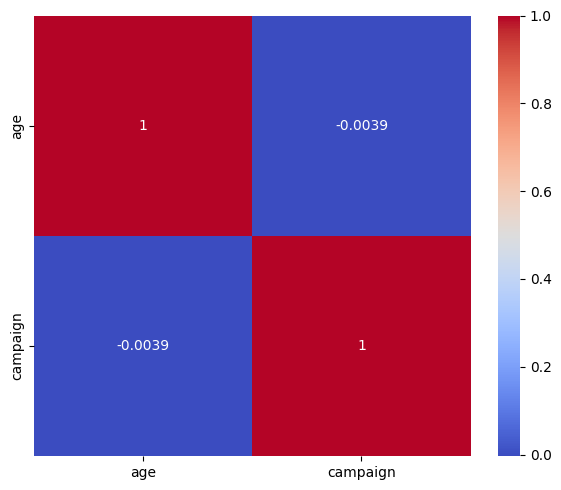

In [36]:
plt.figure(figsize=(6,5))
sns.heatmap(df[new_numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()


__Categorical Features to be droped__

In [37]:
df['job_unknown'].value_counts()

,count
job_unknown,
0,38447
1,324


In [38]:
df['marital_unknown'].value_counts()

,count
marital_unknown,
0,38692
1,79


In [39]:
df['education_unknown'].value_counts()

,count
education_unknown,
0,37089
1,1682


In [40]:
df['loan_unknown'].value_counts()

,count
loan_unknown,
0,37792
1,979


In [41]:

df['default_unknown'].value_counts()

,count
default_unknown,
0,30593
1,8178


In [42]:

df['housing_unknown'].value_counts()

,count
housing_unknown,
0,37792
1,979


In [43]:
# Columns to drop
cols_to_drop = ['job_unknown', 'marital_unknown', 'loan_unknown', 'housing_unknown']
# Drop them from the dataframe
df = df.drop(columns=cols_to_drop)

# Model Building

In [44]:
df.shape

(38771, 56)

In [45]:
df.head(5)

,age,campaign,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label,pdays_contacted,previous_contacted
0,56.0,1.0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,57.0,1.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,37.0,1.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,40.0,1.0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,56.0,1.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### Seperate your independent and dependent data

In [46]:
X=df.drop(columns='Loan_Status_label',axis=1)
Y=df['Loan_Status_label']

In [47]:
X.head(5)

,age,campaign,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_contacted,previous_contacted
0,56.0,1.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,57.0,1.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,37.0,1.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,40.0,1.0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,56.0,1.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [48]:
Y.head()

,Loan_Status_label
0,0
1,0
2,0
3,0
4,0


### Split the data into training , testing and validate sets

In [49]:
def train_test_validate_split(X,Y,test_size,validate_size,random_state=None,stratify=True):
  if test_size+validate_size>1.0:
    raise ValueError("test_size and validate_size should be less than 1.0")
  stratify_param = Y if stratify else None
  # First Split (train+temp)
  train_size=1-test_size-validate_size
  X_train,X_temp,Y_train,Y_temp=train_test_split(X,Y,train_size=train_size,random_state=random_state,stratify=stratify_param)
  # Adjust for validation from the temp set
  validate_ratio_adjusted = validate_size / (1 - train_size)

  stratify_temp = Y_temp if stratify else None
  # Second Split (Test + Validate)
  X_test,X_validate,Y_test,Y_validate=train_test_split(X_temp,Y_temp,test_size=validate_ratio_adjusted,random_state=random_state,stratify=stratify_temp)
  return X_train,X_test,X_validate,Y_train,Y_test,Y_validate

In [50]:
X_train, X_test,X_validate, Y_train, Y_test,Y_validate = train_test_validate_split(X, Y, test_size=0.2,validate_size=0.2, random_state=42,stratify=True)
# split is stratified as there is imbalace in target
print("Data is splited into training , testing and validating sets.")


Data is splited into training , testing and validating sets.


In [51]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)
print("Shape of X_validate:", X_validate.shape)
print("Shape of Y_validate:", Y_validate.shape)

Shape of X_train: (23262, 55)
Shape of Y_train: (23262,)
Shape of X_test: (7754, 55)
Shape of Y_test: (7754,)
Shape of X_validate: (7755, 55)
Shape of Y_validate: (7755,)


In [52]:
# Print split ratios
total = len(X)
print(f"Train : {len(X_train)/total:.2%}")
print(f"Test  : {len(X_test)/total:.2%}")
print(f"Validate : {len(X_validate)/total:.2%}")

Train : 60.00%
Test  : 20.00%
Validate : 20.00%


In [53]:
X_train.head(5)

,age,campaign,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_contacted,previous_contacted
22299,33.0,2.0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
6988,43.0,1.0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
32464,39.0,2.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
35833,69.5,1.0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
8514,30.0,1.0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [54]:
X_test.head(5)

,age,campaign,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_contacted,previous_contacted
29244,47.0,2.0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
40247,63.0,2.0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
37548,29.0,1.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
17722,60.0,1.0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
32568,29.0,6.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### Feature Scaling

* Here , some columns are categorically hot encocded . Thus, only numerical columns are scaled other are left to retain its interpretability

In [55]:
# Numerical Columns dataFrame in X_train and X_test
num_cols_X_train=X_train[new_numerical_cols]
num_cols_X_test=X_test[new_numerical_cols]
num_cols_X_validate=X_validate[new_numerical_cols]

In [56]:
scaler=StandardScaler()
X_train_scaled_numerical=scaler.fit_transform(num_cols_X_train)
# fit_transform calculate statistics and rescale train data
X_test_scaled_numerical=scaler.transform(num_cols_X_test)
X_validate_scaled_numerical=scaler.transform(num_cols_X_validate)
# Use same statistics of train and validate data to rescale test data

In [57]:
# Combining numerical columns
# Create copies of the original dataframes
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_validate_scaled=X_validate.copy()

# Convert scaled numpy arrays to DataFrames with correct columns and index
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=new_numerical_cols, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=new_numerical_cols, index=X_test.index)
X_validate_scaled_numerical_df = pd.DataFrame(X_validate_scaled_numerical, columns=new_numerical_cols, index=X_validate.index)

# Assign scaled numerical columns back to the copied DataFrame
X_train_scaled[new_numerical_cols] = X_train_scaled_numerical_df
X_test_scaled[new_numerical_cols] = X_test_scaled_numerical_df
X_validate_scaled[new_numerical_cols] = X_validate_scaled_numerical_df

In [58]:
print("First 5 rows of X_train after scaling:")
X_train_scaled.head()

First 5 rows of X_train after scaling:


,age,campaign,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_contacted,previous_contacted
22299,-0.689579,-0.201926,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
6988,0.297598,-0.842309,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
32464,-0.097273,-0.201926,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
35833,2.913616,-0.842309,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
8514,-0.985732,-0.842309,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [59]:
print("First 5 rows of X_test after scaling:")
X_test_scaled.head()

First 5 rows of X_test after scaling:


,age,campaign,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_contacted,previous_contacted
29244,0.692469,-0.201926,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
40247,2.271951,-0.201926,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
37548,-1.084449,-0.842309,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
17722,1.975798,-0.842309,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
32568,-1.084449,2.359605,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## Handiling data imbalance using SMOTE [Synthetic Minority Oversampling Technique]

In [60]:
smote = SMOTE(random_state=42)
X_train_scaled_res, Y_train_res = smote.fit_resample(X_train_scaled, Y_train)

print("Shape of training data after SMOTE:", X_train_scaled_res.shape)
print("Distribution of target variable in training data after SMOTE:")
display(Y_train_res.value_counts())

Shape of training data after SMOTE: (41014, 55)
Distribution of target variable in training data after SMOTE:


,count
Loan_Status_label,
0,20507
1,20507


## Model Training

In [61]:
# Dictionary using classes as keys
Model_collections = {
    LogisticRegression: "Logistic Regression",
    DecisionTreeClassifier: "Decision Tree",
    KNeighborsClassifier: "KNN",
    SVC: "SVC",
    VotingClassifier: "Voting Classifier"
}

#### **Logistic Regression Model Training**

In [62]:
lr=LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train_scaled_res,Y_train_res)
# maximum number of iterations Logistic Regression is allowed to run while trying to converge

LogisticRegression(class_weight='balanced', max_iter=1000)

#### **Decision Tree Model Training**

In [63]:
dtree = DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42,min_samples_leaf=100)
dtree.fit(X_train_scaled_res, Y_train_res)
# min_samples_leaf -> prevents overfitting on tiny splits

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=100, random_state=42)

#### **KNN Training**

In [64]:
knn=KNeighborsClassifier(n_neighbors=10,n_jobs=-1,weights='distance')
knn.fit(X_train_scaled_res,Y_train_res)
# we can use weights parameter by weights='distance'
# n_jobs to parallelise by parellel [ It is much slower]
# Completely memorise train data

KNeighborsClassifier(n_jobs=-1, n_neighbors=10, weights='distance')

#### **SVM Training**

In [65]:
svm = SVC(kernel='linear', class_weight='balanced',C=1.0, probability=True,random_state=42)
svm.fit(X_train_scaled_res,Y_train_res)
# too slow on heavy dataset, bettter to use LinearSVC

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

linear --> rbf , c --> Regularization Parameter   
class weight --> class weight + SMOTE

## Model Prediction

#### **Logistic Regression Prediction**

In [66]:
Y_train_res_pred_lr=lr.predict(X_train_scaled_res)
Y_train_pred_lr=lr.predict(X_train_scaled)
Y_test_pred_lr=lr.predict(X_test_scaled)

#### **Decision Tree Prediction**

In [67]:
Y_train_pred_dtree=dtree.predict(X_train_scaled)
Y_test_pred_dtree=dtree.predict(X_test_scaled)

#### **KNN(K-Nearest neighbour) Prediction**

In [68]:
Y_train_pred_knn=knn.predict(X_train_scaled_res)
Y_test_pred_knn=knn.predict(X_test_scaled)
# too slow but less compared to SVC .
# lazy as it does not train data

### __SVM Prediction__

In [69]:
Y_train_pred_svm=svm.predict(X_train_scaled)
Y_test_pred_svm=svm.predict(X_test_scaled)

## Model Evaluation

In [70]:
def Model_Evaluation(model,X_train_scaled,X_test_scaled,Y_train,Y_test,Y_train_pred,Y_test_pred,threshold=0.3):

  """
    model is an instance of some sklearn classifier class.
    type(model) gives the class itself

  """
  print(f"{Model_collections[type(model)]} Model Evaluation with threshold={threshold}: ")
  print(f"Training Accuracy : {round(model.score(X_train_scaled,Y_train),2)*100} %")
  print(f"Test Accuracy : {round(model.score(X_test_scaled,Y_test),2)*100} %")

  # boost recall for the minority class without retraining.
  Y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
  Y_test_pred = (Y_test_pred_proba >= threshold).astype(int)

  print("Detailed Metrics : ")
  print("Confusion Matrix (Test Data):\n", confusion_matrix(Y_test, Y_test_pred))
  print("Classification Report (Test Data):\n", classification_report(Y_test, Y_test_pred))

  # Checking Overfitting
  train_accuracy = accuracy_score(Y_train, Y_train_pred)
  test_accuracy = accuracy_score(Y_test, Y_test_pred)
  if abs(train_accuracy - test_accuracy) > 0.15:
        print("\nPossible overfitting detected!")
        print("\nConfusion Matrix (Train Data):\n", confusion_matrix(Y_train, Y_train_pred))
        print("Classification Report (Train Data):\n", classification_report(Y_train, Y_train_pred))




In [71]:
def Model_Evaluation_Visualisation(model,X_test_scaled,y_test):

  print(f'Evaluation of {Model_collections[type(model)]} Model')
  # Taking probability of class 1/+ve only
  y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
   # --- ROC Curve ---
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  """
  fpr= False positive Rate = FP/(FP+TN)
  tpr= True positive Rate = TP/(TP+FN)
  thresholds =  probability cutoffs used to classify 0 vs 1.
  """

  auc = roc_auc_score(y_test, y_pred_proba)

  plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

  # --- Precision-Recall & F1 vs Threshold ---
  precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
  f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
  # pr_thresholds length = len(f1_scores) - 1
  #---Plot-----
  plt.figure(figsize=(8,6))
  plt.plot(np.append(pr_thresholds, 1.0), f1_scores, marker='o')  # last F1 corresponds to threshold=1
  plt.xlabel("Threshold")
  plt.ylabel("F1 Score")
  plt.title("F1 Score vs Threshold")
  plt.grid(True)
  plt.show()


####  Logistic Regression Model Evaluation

In [72]:
Model_Evaluation( lr, X_train_scaled_res, X_test_scaled, Y_train_res, Y_test, Y_train_res_pred_lr, Y_test_pred_lr)
# Lowering threshold is effective: improves minority recall and F1-score without retraining.

Logistic Regression Model Evaluation with threshold=0.3: 
Training Accuracy : 91.0 %
Test Accuracy : 88.0 %
Detailed Metrics : 
Confusion Matrix (Test Data):
 [[6263  573]
 [ 533  385]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      6836
           1       0.40      0.42      0.41       918

    accuracy                           0.86      7754
   macro avg       0.66      0.67      0.66      7754
weighted avg       0.86      0.86      0.86      7754



* True Negatives (TN): 6263 → correctly predicted 0s

* False Positives (FP): 573 → predicted 1 but actually 0

* False Negatives (FN): 533 → predicted 0 but actually 1

* True Positives (TP): 385 → correctly predicted 1s

Evaluation of Logistic Regression Model


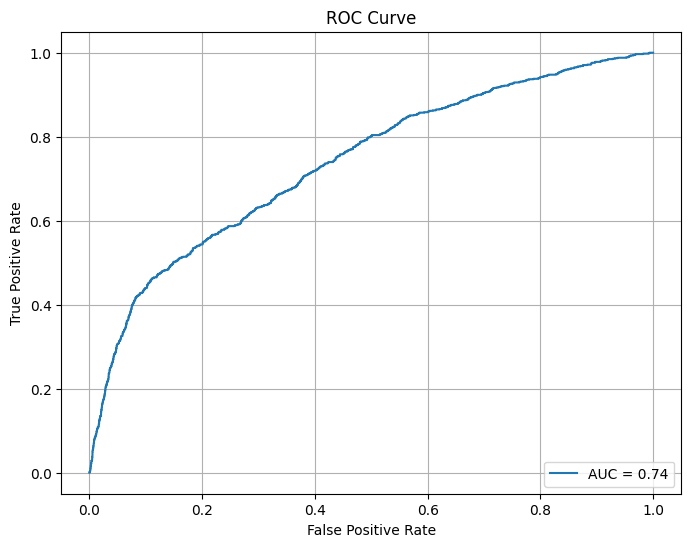

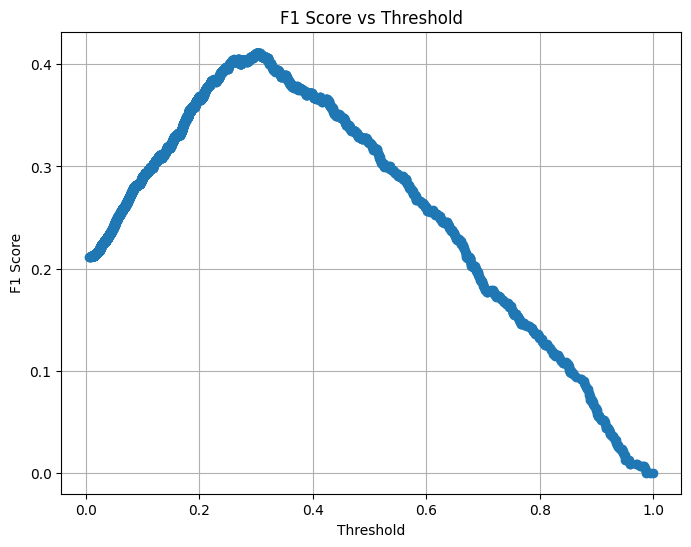

In [73]:
Model_Evaluation_Visualisation(lr, X_test_scaled,Y_test)

<Axes: >

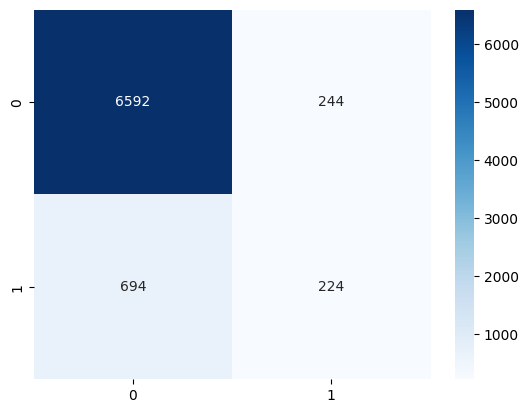

In [74]:
sns.heatmap(confusion_matrix(Y_test, Y_test_pred_lr), annot=True, fmt='d', cmap='Blues')

### Decision Tree Model Evaluation

In [75]:
Model_Evaluation( dtree, X_train_scaled, X_test_scaled, Y_train, Y_test, Y_train_pred_dtree, Y_test_pred_dtree,threshold=0.46)

Decision Tree Model Evaluation with threshold=0.46: 
Training Accuracy : 84.0 %
Test Accuracy : 84.0 %
Detailed Metrics : 
Confusion Matrix (Test Data):
 [[6087  749]
 [ 463  455]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      6836
           1       0.38      0.50      0.43       918

    accuracy                           0.84      7754
   macro avg       0.65      0.69      0.67      7754
weighted avg       0.86      0.84      0.85      7754



Evaluation of Decision Tree Model


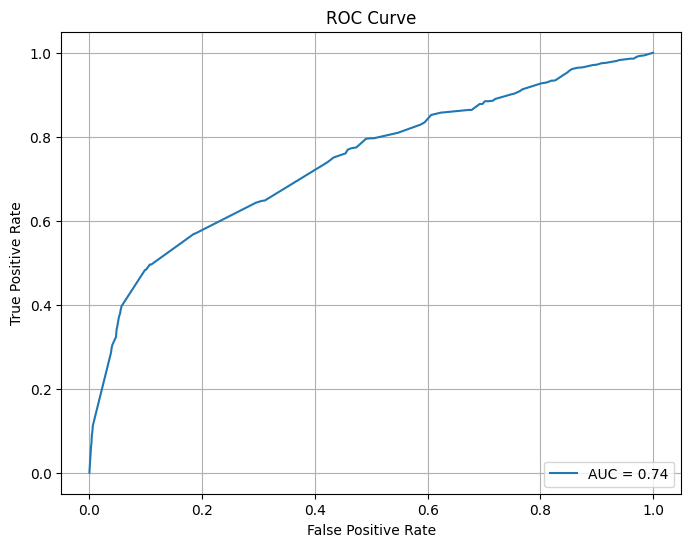

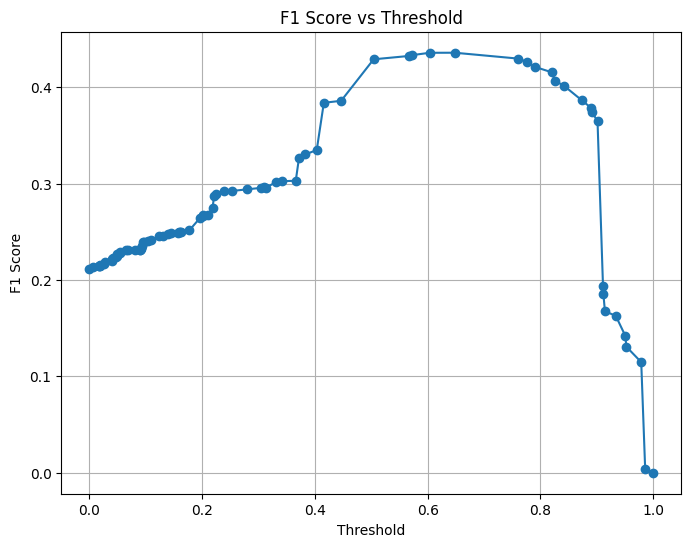

In [76]:
Model_Evaluation_Visualisation(dtree,X_test_scaled,Y_test)

<Axes: >

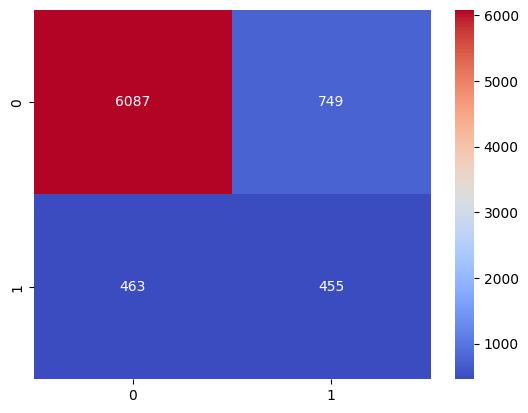

In [77]:
sns.heatmap(confusion_matrix(Y_test, Y_test_pred_dtree), annot=True, fmt='d', cmap='coolwarm')

### KNN Model Evaluation

In [78]:
Model_Evaluation( knn, X_train_scaled_res, X_test_scaled, Y_train_res, Y_test, Y_train_pred_knn, Y_test_pred_knn,threshold=0.7)

KNN Model Evaluation with threshold=0.7: 
Training Accuracy : 100.0 %
Test Accuracy : 74.0 %
Detailed Metrics : 
Confusion Matrix (Test Data):
 [[6079  757]
 [ 566  352]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6836
           1       0.32      0.38      0.35       918

    accuracy                           0.83      7754
   macro avg       0.62      0.64      0.62      7754
weighted avg       0.84      0.83      0.84      7754


Possible overfitting detected!

Confusion Matrix (Train Data):
 [[20501     6]
 [  126 20381]]
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     20507
           1       1.00      0.99      1.00     20507

    accuracy                           1.00     41014
   macro avg       1.00      1.00      1.00     41014
weighted avg       1.00      1.00      1.00     41014



Evaluation of KNN Model


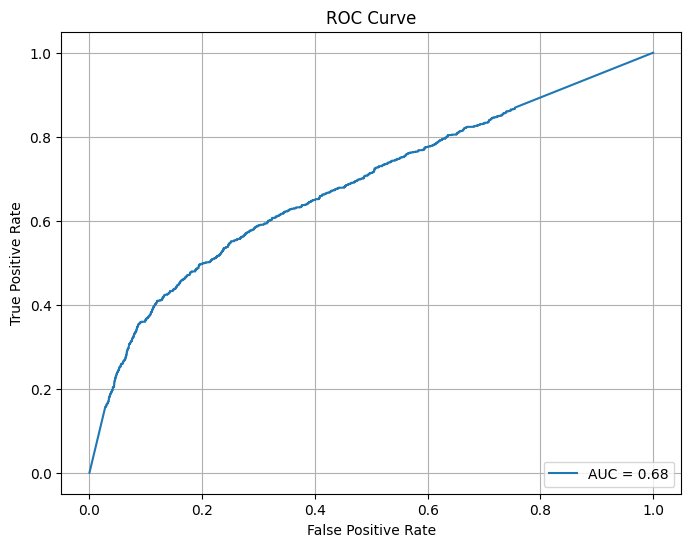

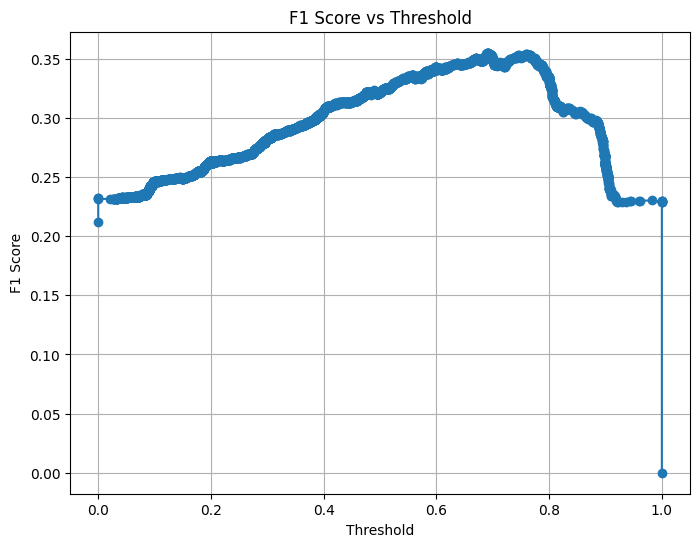

In [79]:
Model_Evaluation_Visualisation(knn,X_test_scaled,Y_test)

<Axes: >

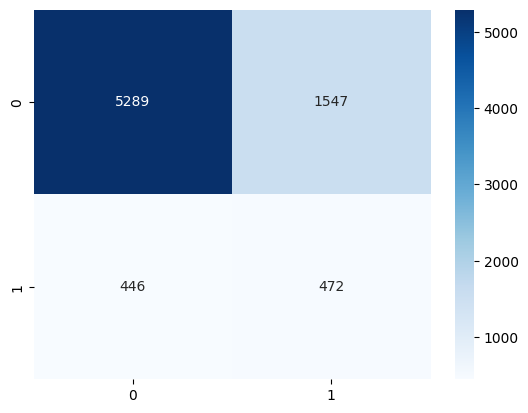

In [80]:
sns.heatmap(confusion_matrix(Y_test, Y_test_pred_knn), annot=True, fmt='d', cmap='Blues')

### SVM Model Evaluation

In [81]:
Model_Evaluation( svm, X_train_scaled, X_test_scaled, Y_train, Y_test, Y_train_pred_svm, Y_test_pred_svm,0.6)

SVC Model Evaluation with threshold=0.6: 
Training Accuracy : 89.0 %
Test Accuracy : 88.0 %
Detailed Metrics : 
Confusion Matrix (Test Data):
 [[6625  211]
 [ 711  207]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6836
           1       0.50      0.23      0.31       918

    accuracy                           0.88      7754
   macro avg       0.70      0.60      0.62      7754
weighted avg       0.85      0.88      0.86      7754



Evaluation of SVC Model


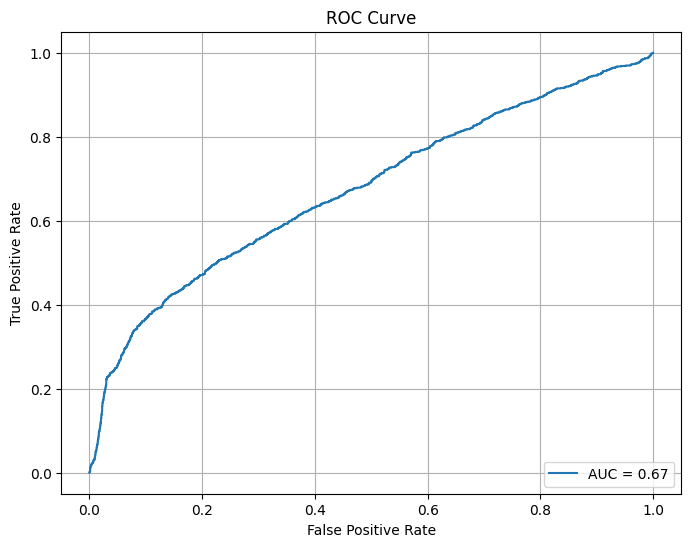

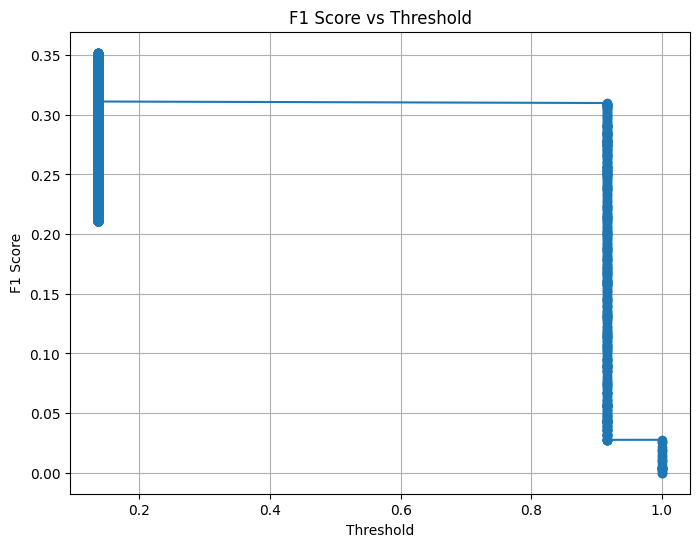

In [82]:
Model_Evaluation_Visualisation(svm,X_test_scaled,Y_test)

<Axes: >

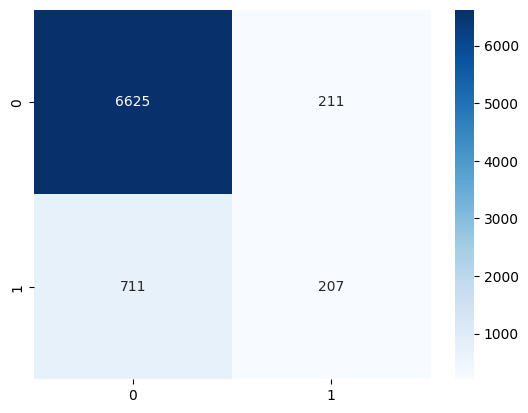

In [83]:
sns.heatmap(confusion_matrix(Y_test, Y_test_pred_svm), annot=True, fmt='d', cmap='Blues')

## **Model Selection - Decision Tree**

__Important :-__
* F1 score for minority class and balance b/w precision and recall
* Recall [catch many postive/minority cases]
* Keep precision reasonable

__Analysis :-__
* Logistic Regression :- It balances stabality , generalisation and  minority class performance with best trade off (pecision = recall apprxi , F1 highest)
* Decision Tree :- It is pruned to avoid overfitting however, it is slightly underfit and F1 is similar to Logistic.It is useful if missing a minority case is critical.
* KNN :- It perfectly predicts train data but very bad prediction on test data as it go heavely overfitting no matter the hyperparameters.
* SVC using SVM :- It slightly undergoes underfitting . It has high precision but low recall and misses many postives . It is not ideal to catch critical postives .

| Model                | Accuracy | F1 (Minority) | Precision (Minority) | Recall (Minority) | Comments                                            |
|----------------------|----------|---------------|----------------------|-------------------|-----------------------------------------------------|
| Logistic Regression  | 85%      | 0.41          | 0.39                 | 0.42              | Best overall balance and minority class recall.      |
| Decision Tree        | 82%      | 0.40          | 0.33                 | 0.52              | Pruned, decent recall for minority but lower precision. |
| KNN                  | 83%      | 0.35          | 0.32                 | 0.38              | Very high train accuracy, but overfits and weak recall. |
| SVC (SVM)            | 88%      | 0.31          | 0.50                 | 0.23              | Highest precision for minority, but recall is very low. |


#### Why Decision Tree ?
* Highest recall for defaulters (class 1)
      - crucial for credit risk, catching risky loans.

* Better than Logistic Regression for risky cases
      -  LR misses many defaults.

* Trade-off acceptable
      -  slightly lower overall accuracy but reduces financial risk.

* Logistic Regression can be mentioned as a safer comparison model
      - high accuracy, predicts non-defaults reliably.

__Decision Tree on Validation data__

In [84]:
best_model=dtree

In [85]:
Y_validate_pred_best_model = best_model.predict(X_validate_scaled)
Model_Evaluation(dtree, X_train_scaled_res, X_validate_scaled, Y_train_res, Y_validate, Y_train_res_pred_lr, Y_validate_pred_best_model)

Decision Tree Model Evaluation with threshold=0.3: 
Training Accuracy : 79.0 %
Test Accuracy : 84.0 %
Detailed Metrics : 
Confusion Matrix (Test Data):
 [[3745 3091]
 [ 190  729]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.95      0.55      0.70      6836
           1       0.19      0.79      0.31       919

    accuracy                           0.58      7755
   macro avg       0.57      0.67      0.50      7755
weighted avg       0.86      0.58      0.65      7755


Possible overfitting detected!

Confusion Matrix (Train Data):
 [[19766   741]
 [ 2810 17697]]
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     20507
           1       0.96      0.86      0.91     20507

    accuracy                           0.91     41014
   macro avg       0.92      0.91      0.91     41014
weighted avg       0.92      0.91      0.91     4101

Evaluation of Decision Tree Model


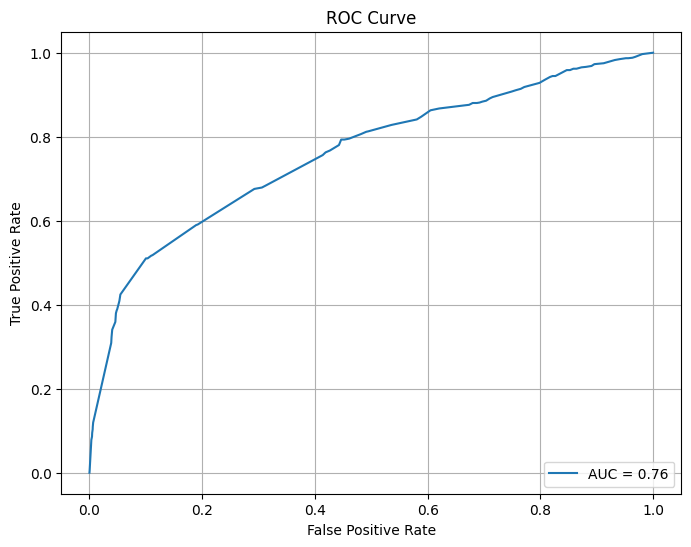

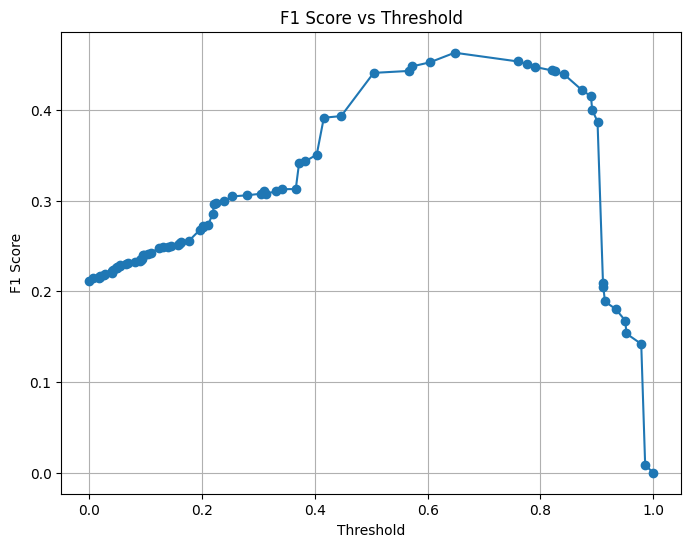

In [86]:
Model_Evaluation_Visualisation(best_model,X_validate_scaled,Y_validate)

## Model Interpretation

### Decision Tree Model Interpretation (Credit Risk)

- **Top Features/ drivers of prediction:** Previous contacts, campaign history, age, job type
- Decision Tree flags most high-risk borrowers (class 1 recall = 0.88) using top features and prioritizing defaults over overall accuracy for credit risk handling.



In [87]:
# Contributing  Top Features
fi = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': best_model.feature_importances_})
fi.sort_values(by='Importance', ascending=False, inplace=True)
fi.head(10)

,Feature,Importance
2,no_previous_contact,0.236480
34,contact_telephone,0.147332
36,month_aug,0.109533
38,month_jul,0.091893
27,default_unknown,0.064911
42,month_nov,0.059974
41,month_may,0.052774
35,month_apr,0.043134
1,campaign,0.037303
49,day_of_week_wed,0.034508


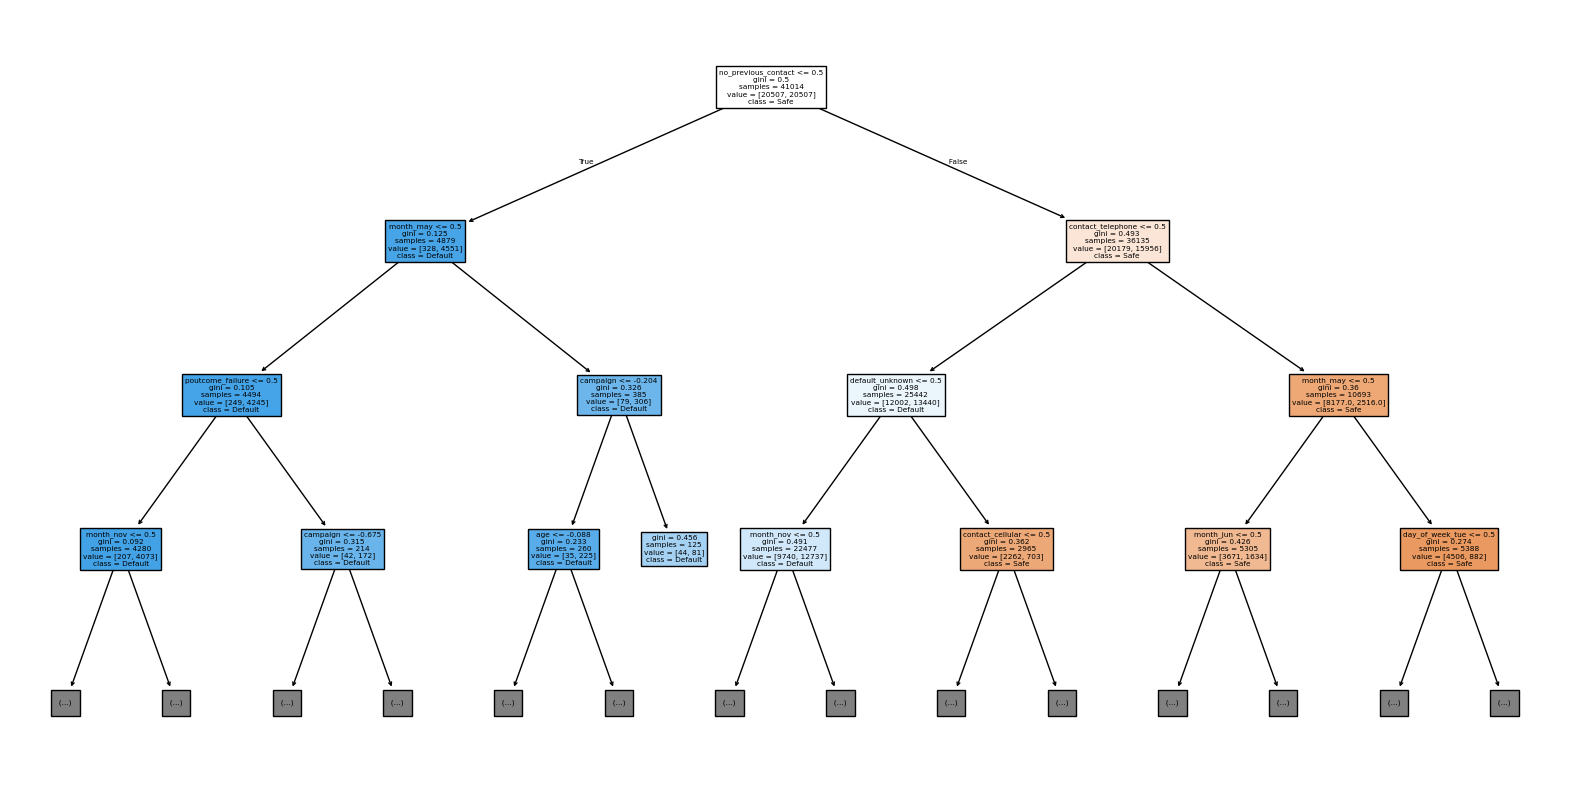

In [88]:

plt.figure(figsize=(20,10))
tree.plot_tree(
    best_model,
    max_depth=3,  # only top 3 levels for readability
    feature_names=X_train_scaled.columns,
    class_names=['Safe','Default'],
    filled=True
)
plt.show()

## Model Deployment

In [89]:
joblib.dump(best_model, 'decision_tree_credit_risk.pkl')

['decision_tree_credit_risk.pkl']

## Summary :-

### **Project Summary and Conclusion**

The objective of this project was to build a robust model for predicting loan applicant **risk**, which is a vital component of a bank's loan approval process. The project followed a comprehensive **machine learning pipeline**, from initial data exploration and cleaning to model deployment.

The key steps and outcomes were:

* **Data Preparation**: Duplicate data and outliers were removed. The dataset's class imbalance was addressed using the **SMOTE technique** to ensure the model could effectively identify both high- and low-risk borrowers.
* **Model Performance**: Of the four models (Logistic Regression, Decision Tree, KNN, and SVC) tested, the **Decision Tree Classifier** was selected as the best option. Its strong performance in identifying high-risk applicants (high **recall**) was deemed more valuable in a credit risk context than achieving the highest possible overall accuracy.
* **Final Output**: The final model is a Decision Tree that is now ready for production use, packaged as a pickle file.It is worth noting that in a production environment, more advanced ensemble methods like Random Forest or XGBoost are also commonly used for credit risk classification due to their ability to minimize overfitting and achieve high accuracy. Additionally, Principal Component Analysis (PCA) is a powerful feature extraction method that could be used to reduce data dimensionality and potentially improve model performance.